In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
y = iris.target
data['Species'] = y
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = data.iloc[:,2:4] # 花瓣长度和花瓣宽度
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [4]:
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [41]:
tree_clf = DecisionTreeClassifier(max_depth=8,criterion='gini')
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [42]:
y_test_pred = tree_clf.predict(X_test)

In [43]:
accuracy_score(y_test,y_test_pred)

1.0

In [44]:
# 重要性指标 
tree_clf.feature_importances_

array([0.91612234, 0.08387766])

In [45]:
export_graphviz(tree_clf,out_file='./iris.dot',feature_names=iris.feature_names[2:4],class_names=iris.target_names,rounded=True,filled=True)

In [7]:
deepth = np.arange(1,15)
err_list = []
for d in deepth:
    print(d)
    clf = DecisionTreeClassifier(max_depth=d,criterion='gini')
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    y_test_pred = clf.predict(X_test)
    result = (y_test == y_test_pred)
    err = 1 - np.mean(result)
    err_list.append(err)
    print(d,' 错误率：%.2f%%' % (100*err))

1
1  错误率：31.58%
2
2  错误率：2.63%
3
3  错误率：0.00%
4
4  错误率：0.00%
5
5  错误率：0.00%
6
6  错误率：0.00%
7
7  错误率：0.00%
8
8  错误率：0.00%
9
9  错误率：0.00%
10
10  错误率：0.00%
11
11  错误率：0.00%
12
12  错误率：0.00%
13
13  错误率：0.00%
14
14  错误率：0.00%


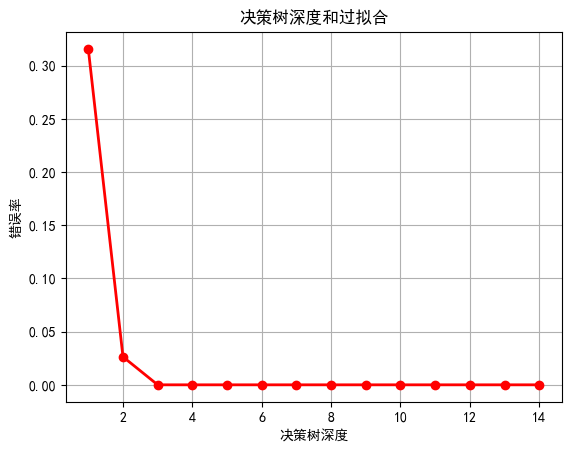

In [9]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(facecolor = 'w')
plt.plot(deepth,err_list,'ro-',lw = 2)
plt.xlabel('决策树深度')
plt.ylabel('错误率')
plt.title('决策树深度和过拟合')
plt.grid(True)
plt.show()